In [12]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [13]:
#input1
df1 = pd.read_csv('train.csv')
df1

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,2ZR62O53,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,ZJ31SS7Q,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,I31VI9RK,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,6GP9WLYR,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,3DVR0TDD,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English
...,...,...,...,...,...,...,...,...,...,...,...
795,M3VVKDII,155187570,57120,19298,2647,179420,132867,4071398,1,0,Italian
796,H4RDC7MS,154982550,87945,7136,1711,245715,122045,3621969,1,1,Portuguese
797,3OR62HLN,154727730,94275,6213,1605,114154,32991,3059244,1,0,Spanish
798,Y7UCJJTF,154595850,85635,8533,1777,120494,28322,3446723,1,0,Spanish


In [14]:
#input2
df2 = pd.read_csv('test.csv')
df2

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Views gained,Partnered,Mature,Language
0,97R8L3J0,154332060,27105,29983,5864,308815,8255635,0,0,Russian
1,6UV44QFF,154277370,87375,9437,1759,151886,3019137,1,1,French
2,2WKQZUGR,154125945,77475,9460,2106,411346,4832180,1,0,Turkish
3,R4DGVX2D,153988380,83325,11200,1787,272635,4345590,1,0,French
4,P8YSNIOI,153963765,110910,14329,1281,106365,1449834,1,1,English
...,...,...,...,...,...,...,...,...,...,...
195,8Q556ABI,122524635,13560,21359,9104,601927,2162107,1,0,Spanish
196,AXQ2XZ45,122523705,153000,3940,793,213212,4399897,1,0,Korean
197,AP7UE7SZ,122452320,217410,6431,567,109068,3417970,1,0,Korean
198,PNCBWRE4,122311065,104745,10543,1153,547446,3926918,1,0,English


### exploration of the data

C:\Users\help\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Watch time(Minutes)', ylabel='Density'>

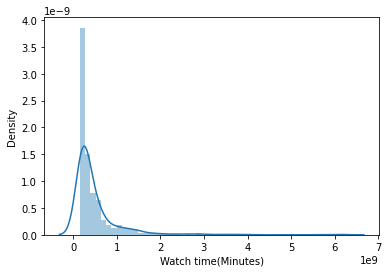

In [15]:
sns.distplot(df1['Watch time(Minutes)'])

C:\Users\help\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Stream time(minutes)', ylabel='Density'>

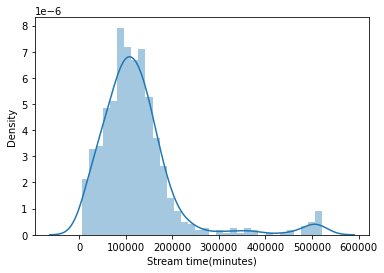

In [16]:
sns.distplot(df1['Stream time(minutes)'])

In [17]:
# see whether they follow 

C:\Users\help\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stream time(minutes)'>

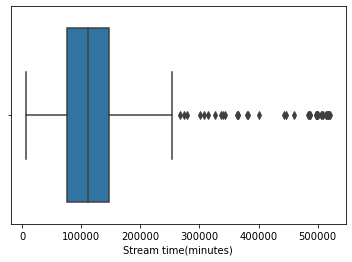

In [18]:
sns.boxplot(df1['Stream time(minutes)'])

### data preprocessing

In [19]:
#check the existence of the null values in the data
df1.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [20]:
#add one more feature for higher accuracty: Average view-to-Follower ratio
df1['view_follower_ratio'] = df1['Average viewers'] / df1['Followers']
df1

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,view_follower_ratio
0,2ZR62O53,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English,0.008538
1,ZJ31SS7Q,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English,0.004823
2,I31VI9RK,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese,0.006209
3,6GP9WLYR,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English,0.001955
4,3DVR0TDD,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English,0.003312
...,...,...,...,...,...,...,...,...,...,...,...,...
795,M3VVKDII,155187570,57120,19298,2647,179420,132867,4071398,1,0,Italian,0.014753
796,H4RDC7MS,154982550,87945,7136,1711,245715,122045,3621969,1,1,Portuguese,0.006963
797,3OR62HLN,154727730,94275,6213,1605,114154,32991,3059244,1,0,Spanish,0.014060
798,Y7UCJJTF,154595850,85635,8533,1777,120494,28322,3446723,1,0,Spanish,0.014748


C:\Users\help\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view_follower_ratio'>

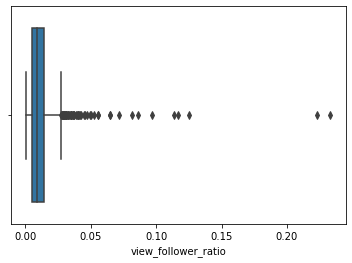

In [21]:
sns.boxplot(df1['view_follower_ratio'])

In [22]:
#checking dtypes of each column
df1.dtypes

Channel                  object
Watch time(Minutes)       int64
Stream time(minutes)      int64
Peak viewers              int64
Average viewers           int64
Followers                 int64
Followers gained          int64
Views gained              int64
Partnered                 int64
Mature                    int64
Language                 object
view_follower_ratio     float64
dtype: object

In [23]:
df1.describe().T #stats of the test data

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),800.0,4.888771e+08,5.940109e+08,1.545242e+08,2.004784e+08,2.899965e+08,5.276095e+08,6.196162e+09
Stream time(minutes),800.0,1.245265e+05,8.762512e+04,6.195000e+03,7.658625e+04,1.108575e+05,1.476638e+05,5.214450e+05
Peak viewers,800.0,4.230734e+04,6.569140e+04,1.182000e+03,1.080075e+04,1.960700e+04,4.372700e+04,6.393750e+05
Average viewers,800.0,5.402686e+03,9.180192e+03,3.130000e+02,1.727750e+03,2.829500e+03,5.465500e+03,1.476430e+05
Followers,800.0,6.449188e+05,8.733633e+05,3.660000e+03,1.988715e+05,3.660885e+05,7.319040e+05,8.938903e+06
Followers gained,800.0,2.299286e+05,3.704139e+05,-1.577200e+04,4.940325e+04,1.142085e+05,2.533272e+05,3.966525e+06
Views gained,800.0,1.335486e+07,2.732344e+07,1.757880e+05,4.889789e+06,7.630136e+06,1.378407e+07,6.701375e+08
Partnered,800.0,9.862500e-01,1.165243e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Mature,800.0,2.175000e-01,4.128035e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view_follower_ratio,800.0,1.218502e-02,1.634936e-02,3.968636e-04,4.930182e-03,8.497441e-03,1.394530e-02,2.330534e-01


In [24]:
# ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'no_view_follower_ratio'] should be X inputs
X = df1[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
       'Average viewers', 'Followers', 'view_follower_ratio']]
y = df1['Followers gained']

In [25]:
print(X.shape)
print(y.shape)

(800, 6)
(800,)


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#define X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [27]:
#preprocessing step
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### linear regression

In [33]:
#import libraries related to ilnear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
print(X_test.shape)

(160, 6)


In [35]:
print(X_train.shape)
print(y_train.shape)

(640, 6)
(640,)


In [37]:
lr =   LinearRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

print('r2 score: ', str(r2_score(y_test, pred)))
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, pred)))) # RMSE = root mean squared error

r2 score:  0.5605800364079346
RMSE:  287891.47688308347


#### accuracy of the model

In [38]:
print("accuracy of the train score: {:.3f}".format(lr.score(X_train, y_train)))
print("accuracy of the test score: {:.3f}".format(lr.score(X_test, y_test)))

accuracy of the train score: 0.546
accuracy of the test score: 0.561


In [46]:
#add one more feature for higher accuracty: Average view-to-Follower ratio
df2['view_follower_ratio'] = df1['Average viewers'] / df1['Followers']
df2

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Views gained,Partnered,Mature,Language,view_follower_ratio
0,97R8L3J0,154332060,27105,29983,5864,308815,8255635,0,0,Russian,0.008538
1,6UV44QFF,154277370,87375,9437,1759,151886,3019137,1,1,French,0.004823
2,2WKQZUGR,154125945,77475,9460,2106,411346,4832180,1,0,Turkish,0.006209
3,R4DGVX2D,153988380,83325,11200,1787,272635,4345590,1,0,French,0.001955
4,P8YSNIOI,153963765,110910,14329,1281,106365,1449834,1,1,English,0.003312
...,...,...,...,...,...,...,...,...,...,...,...
195,8Q556ABI,122524635,13560,21359,9104,601927,2162107,1,0,Spanish,0.009863
196,AXQ2XZ45,122523705,153000,3940,793,213212,4399897,1,0,Korean,0.030968
197,AP7UE7SZ,122452320,217410,6431,567,109068,3417970,1,0,Korean,0.013842
198,PNCBWRE4,122311065,104745,10543,1153,547446,3926918,1,0,English,0.031222


In [47]:
final_df = pd.DataFrame()
final_df['Channel'] = df2['Channel']

#check prediction
ex_input = df2[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
       'Average viewers', 'Followers', 'view_follower_ratio']]
ex_pred = lr.predict(ex_input)
final_df['Follwers gained'] = ex_pred
final_df

,Channel,Follwers gained
0,97R8L3J0,6.047632e+12
1,6UV44QFF,6.014743e+12
2,2WKQZUGR,6.055006e+12
3,R4DGVX2D,6.025012e+12
4,P8YSNIOI,5.993736e+12
...,...,...
195,8Q556ABI,4.864630e+12
196,AXQ2XZ45,4.789757e+12
197,AP7UE7SZ,4.766201e+12
198,PNCBWRE4,4.842474e+12


In [48]:
#export "final_df" as excel file
final_df.to_excel('final_pred_LEE,Jooran.xlsx', header= True)

### visualization the prediction by using the testing data

In [49]:
plt.figure(figsize = (10,10))
sns.regplot(pred, y_test)

plt.xlabel('Followers gained')
plt.ylabel('features')
plt.title('linear prediction of the followers gained by a streamer')
plt.show()


TypeError: 'module' object is not callable

In [50]:
#final submission file should be in a similar format as below:
final_ex = pd.read_csv('sample submission.csv')
final_ex

,Channel,Followers gained
0,97R8L3J0,0
1,6UV44QFF,0
2,2WKQZUGR,0
3,R4DGVX2D,0
4,P8YSNIOI,0
...,...,...
195,8Q556ABI,0
196,AXQ2XZ45,0
197,AP7UE7SZ,0
198,PNCBWRE4,0
